In [1]:
import warnings
warnings.simplefilter('ignore')

from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel("Архив заявок.xlsx", sheetname='Лист 1 - nauka_achievements').reset_index(drop = True)

In [3]:
df.head(15)

,ID,Достижение,Направление,Образовательное учреждение,Класс,Регион
0,280,"""Патент. 324324""",Информационные технологии,"""fdgfdg"" ""43543543""",5.0,Иркутская обл
1,280,"""2018. Выборы 2018""",Математика,"""1212"" ""fdgfdg"" ""43543543""",5.0,Москва г
2,280,"""<a target=""_blank"" href=""#file"">Эссе</a>""",Химия,"""Это тестовая заявка!!!"" ""fdgfdg"" ""1212""",10.0,Московская обл
3,288,"""<a target=""_blank"" href=""#file"">Эссе</a>""",Химия,"""Огбд 17"" ""Огбд 17""",10.0,Московская обл
4,290,"""2015. Муниципальный этап ВСОШ по химии""",Биология,"""Муниципальное общеобразовательное учреждение ...",11.0,Московская обл
5,290,"""2016. Региональный этап всош по экологии""",Биология,"""Муниципальное общеобразовательное учреждение ...",11.0,Московская обл
6,290,"""2015. Муниципальный этап ВСОШ по биологии""",Биология,"""Муниципальное общеобразовательное учреждение ...",11.0,Московская обл
7,290,"""2015. Стипендия главы Раменского района""",Биология,"""Муниципальное общеобразовательное учреждение ...",11.0,Московская обл
8,290,"""2017. Региональный этап всош по экологии""",Биология,"""Муниципальное общеобразовательное учреждение ...",11.0,Московская обл
9,290,"""2015. Муниципальный ВСОШ по экологии""",Биология,"""Муниципальное общеобразовательное учреждение ...",11.0,Московская обл


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
ID                            65535 non-null int64
Достижение                    65535 non-null object
Направление                   65535 non-null object
Образовательное учреждение    65532 non-null object
Класс                         65511 non-null float64
Регион                        63839 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


In [5]:
len_df = df.shape

In [6]:
# Видим что все направления относятся к тематике сириуса "Наука"
print (df['Направление'].unique())
print (df['Регион'].unique())

['Информационные технологии' 'Математика' 'Химия' 'Биология' 'Физика'
 'Проектная смена' 'Проектная деятельность в сфере прикладной химии']
['Иркутская обл' 'Москва г' 'Московская обл' 'Адыгея Респ'
 'Красноярский край' 'Липецкая обл' 'Воронежская обл' 'Краснодарский край'
 'Новгородская обл' 'Ростовская обл' 'Тверская обл' 'Томская обл'
 'Калининградская обл' 'Ивановская обл' 'Вологодская обл'
 'Архангельская обл' 'Тульская обл' nan 'Ленинградская обл'
 'Кировская обл' 'Ставропольский край' 'Белгородская обл' 'Смоленская обл'
 'Ярославская обл' 'Удмуртская Респ' 'Кемеровская обл' 'Башкортостан Респ'
 'Пензенская обл' 'Саратовская обл' 'Татарстан Респ' 'Свердловская обл'
 'Санкт-Петербург г' 'Курская обл' 'Рязанская обл' 'Бурятия Респ'
 'Брянская обл' 'Ульяновская обл' 'Пермский край' 'Нижегородская обл'
 'Приморский край' 'Курганская обл' 'Хабаровский край' 'Волгоградская обл'
 'Северная Осетия - Алания Респ' 'Чувашская Респ' 'Алтайский край'
 'Калмыкия Респ' 'Дагестан Респ' 'Костромс

In [7]:
Napravlenie_dummies = pd.get_dummies(df['Направление'])
Region_dummies = pd.get_dummies(df['Регион'])

In [8]:
data = pd.get_dummies(df, columns = ['Направление', 'Регион'])

In [9]:
data = data.drop(['Образовательное учреждение', 'Класс'], 1)

In [10]:
test = df.groupby(['ID'])

In [11]:
test.groups

{280: Int64Index([0, 1, 2], dtype='int64'),
 288: Int64Index([3], dtype='int64'),
 290: Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64'),
 307: Int64Index([17, 18, 19, 20, 21, 22, 23], dtype='int64'),
 309: Int64Index([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], dtype='int64'),
 310: Int64Index([37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype='int64'),
 319: Int64Index([47, 48, 49, 50, 51, 52, 53], dtype='int64'),
 330: Int64Index([54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
             70],
            dtype='int64'),
 333: Int64Index([71], dtype='int64'),
 342: Int64Index([72, 73, 74, 75, 76], dtype='int64'),
 360: Int64Index([ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
              90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
            dtype='int64'),
 369: Int64Index([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
             116, 117, 118, 119, 120, 121, 122, 123, 1

In [12]:
#df_copy = df.copy()
#for i in range (1, len(df)):
#    temp = []
#    tp = []
#    if (df['ID'][i-1] == df['ID'][i]) :
#        temp = df_copy['Достижение'][i]
#        temp2 = df_copy['Достижение'][i-1]
        
#        df_copy['Достижение'][i] = temp + temp2
#print (df_copy['Достижение'][2])

ValueError: cannot convert float NaN to integer

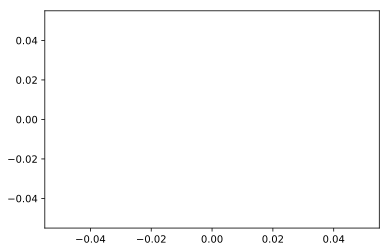

In [28]:
sns.distplot(Napravlenie_dummies['Биология'].where(Napravlenie_dummies['Биология'] == 1))

In [18]:
direction = df['Направление'].values